<a href="https://colab.research.google.com/github/zyf2021/freeCodeCamp/blob/main/Medical_Data_Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Begin

In this project, you will visualize and make calculations from medical examination data using matplotlib, seaborn, and pandas. The dataset values were collected during medical examinations.

Data description
The rows in the dataset represent patients and the columns represent information like body measurements, results from various blood tests, and lifestyle choices. You will use the dataset to explore the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [49]:
df = pd.read_csv('/content/drive/MyDrive/medical_examination.csv')

In [50]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


##Tasks

Create a chart similar to examples/Figure_1.png, where we show the counts of good and bad outcomes for the **cholesterol**, **gluc**, **alco**, **active**, and **smoke** variables for patients with **cardio**=1 and **cardio**=0 in different panels.

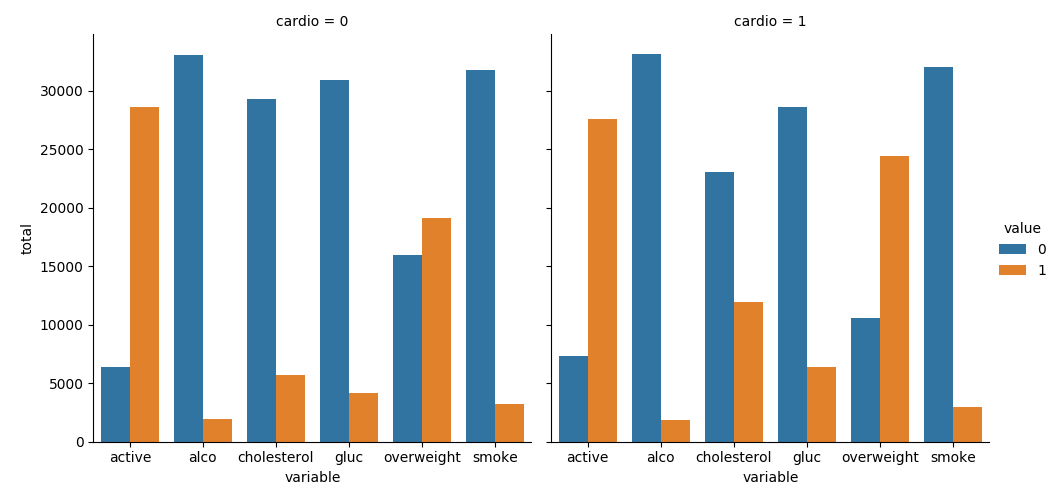

Add an **overweight** column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [5]:
#.apply(lambda g: g.loc[g["salary"] == '>50K'].size
# update values based on condition
# df['new_column'] = new_column.where(df.column2 == 'value1', other=0)

# df1['overtime_salary'] =  df1.apply(lambda row: row['hours_worked'] * row['salary_hour']
#  if row['hours_worked'] > 80 else 0 , axis=1)

In [51]:
numbers = {'mynumbers': [51, 52, 53, 54, 55]}
df1 = pd.DataFrame(numbers, columns =['mynumbers'])

df1['<= 53'] = df1['mynumbers'].apply(lambda x: 'True' if x <= 53 else 'False')

print(df1)

   mynumbers  <= 53
0         51   True
1         52   True
2         53   True
3         54  False
4         55  False


In [52]:
df['overweight'] = df.weight ** 2 / df.height
df['overweight'] = df['overweight'].apply(lambda x: 1 if x > 25 else 0)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


Normalize the data by making 0 always good and 1 always bad. If the value of **cholesterol** or **gluc** is 1, make the value 0. If the value is more than 1, make the value 1.

In [53]:
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x <= 1 else 1)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,1,0,0,0,0,0


In [54]:
df['gluc'] = df['gluc'].apply(lambda x: 0 if x <= 1 else 1)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's **catplot**(). The dataset should be split by 'Cardio' so there is one chart for each **cardio** value. The chart should look like `examples/Figure_1.png.`

In [55]:
vars = sorted(["cholesterol", "gluc", "smoke", "alco", "active", "overweight"])

In [56]:
df_catplot = pd.melt(df, id_vars = ['cardio'], value_vars=vars)
df_catplot = df_catplot.value_counts().reset_index(name="total")
df_catplot

,cardio,variable,value,total
0,1,alco,0,33156
1,0,alco,0,33080
2,1,smoke,0,32050
3,0,smoke,0,31781
4,0,gluc,0,30894
5,0,cholesterol,0,29330
6,1,overweight,1,28769
7,0,active,1,28643
8,1,gluc,0,28585
9,1,active,1,27618


#### Вот что происходит тут я не знаю

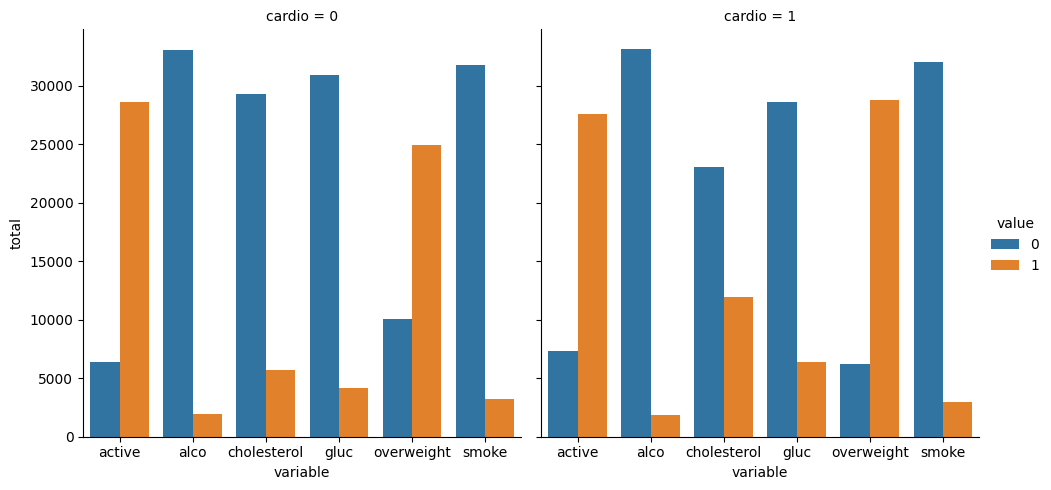

In [57]:
fig = sns.catplot(
    data=df_catplot,
    x="variable",
    y="total",
    hue="value",
    col="cardio",
    kind="bar",
    order=vars,
  )
fig.set_ylabels("total")
fig.set_xlabels("variable")
fig = fig.fig

Clean the data. Filter out the following patient segments that represent incorrect data:

*  diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))

*  height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))

*  height is more than the 97.5th percentile

*  weight is less than the 2.5th percentile

*  weight is more than the 97.5th percentile

In [63]:
df_correct = df.loc[df['ap_lo'] <= df['ap_hi']]
df_correct = df_correct.loc[df_correct['height'] >= df_correct['height'].quantile(0.025)]
df_correct = df_correct.loc[df_correct['height'] <= df_correct['height'].quantile(0.975)]
df_correct = df_correct.loc[df_correct['weight'] >= df_correct['weight'].quantile(0.025)]
df_correct = df_correct.loc[df_correct['weight'] <= df_correct['weight'].quantile(0.975)]
df_correct

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0.0,18393.0,2.0,168.0,62.0,110.0,80.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,20228.0,1.0,156.0,85.0,140.0,90.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
2,2.0,18857.0,1.0,165.0,64.0,130.0,70.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3.0,17623.0,2.0,169.0,82.0,150.0,100.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,4.0,17474.0,1.0,156.0,56.0,100.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991.0,19699.0,1.0,172.0,70.0,130.0,90.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
69994,99992.0,21074.0,1.0,165.0,80.0,150.0,80.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
69995,99993.0,19240.0,2.0,168.0,76.0,120.0,80.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
69998,99998.0,22431.0,1.0,163.0,72.0,135.0,80.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


Create a **correlation matrix** using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. The chart should look like `examples/Figure_2.png.`

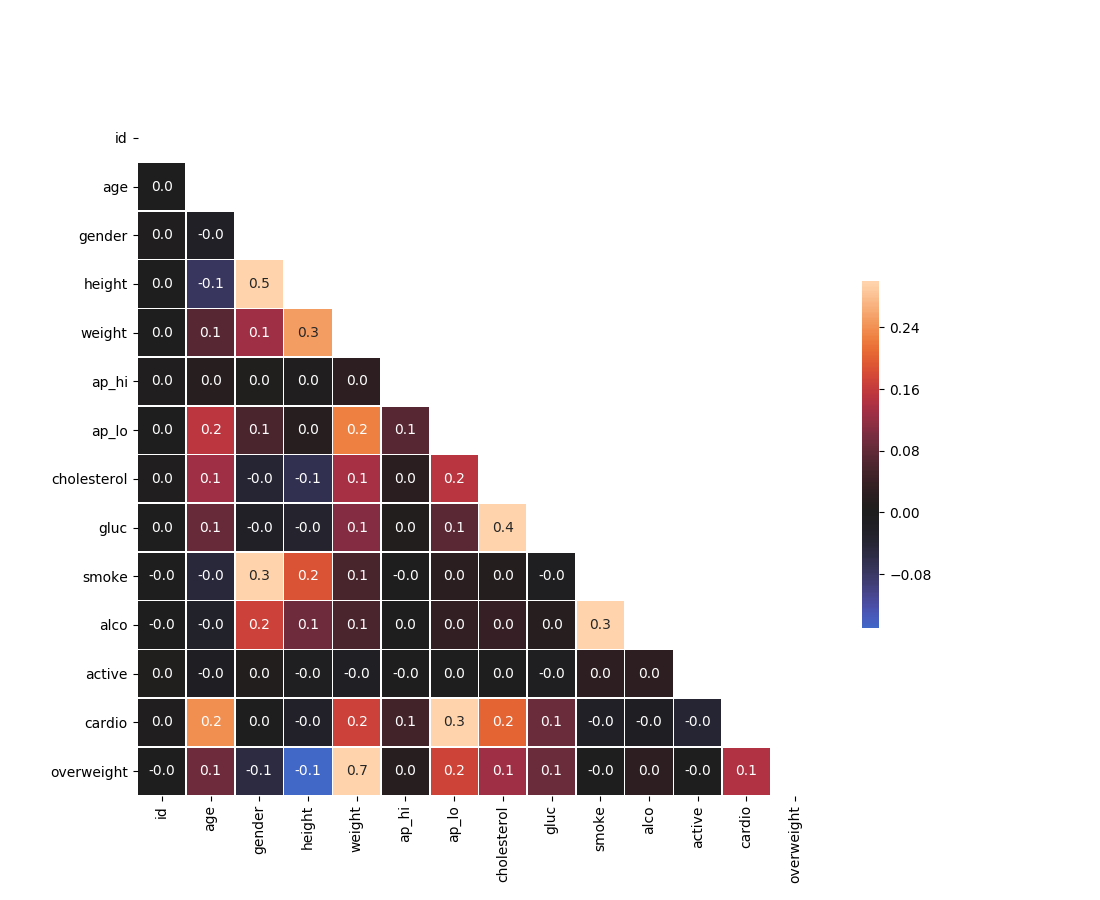

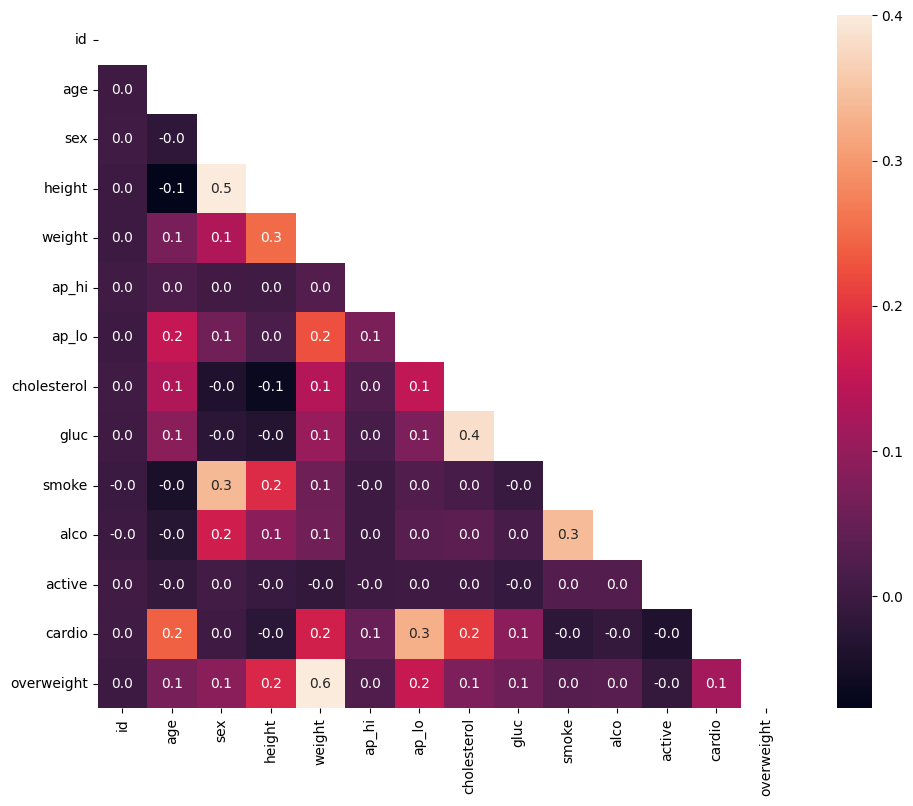

In [64]:
    # Clean the data
df_heat = df.loc[
    (df["ap_lo"] <= df["ap_hi"])
     & (df["height"] >= df["height"].quantile(0.025))
     & (df["height"] <= df["height"].quantile(0.975))
     & (df["weight"] >= df["weight"].quantile(0.025))
     & (df["weight"] <= df["weight"].quantile(0.975))
]

# Calculate the correlation matrix
corr = df_heat.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
    # with sns.axes_style("white"):
fig, ax = plt.subplots(figsize=(12, 9))

    # Draw the heatmap with 'sns.heatmap()'
ax = sns.heatmap(
    corr,
    mask=mask,
    vmax=0.4,
    square=True,
    fmt=".1f",
    annot=True,
)